<a href="https://colab.research.google.com/github/alexey9019/data/blob/master/Copy_of_sem_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Повторение

* Матрица объекты-признаки
 * Числовые
 * Бинарные
 * Категориальные

Данные: матрица признаков
y - целевая переменная - то, что предсказываем (Survived:)

X - все остальные столбцы - данные

Объект - строка

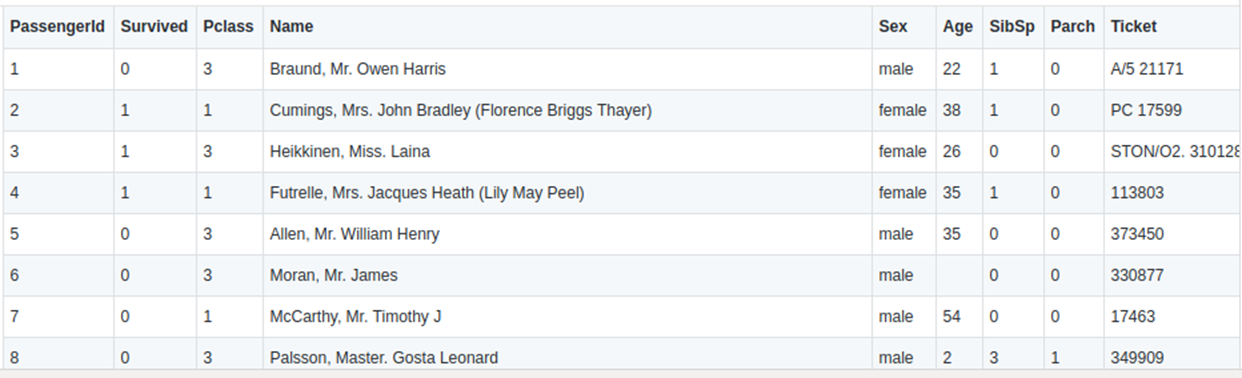

* Визуализация датасетов:

Строим распределение значения переменной по каждому классу (setosa, versicolor, virginica) попарно между всеми признаками датасета:

![ирисы](https://hsto.org/r/w1560/webt/b7/vc/bq/b7vcbqwg6gbebqeg8dlnutmpz5m.png)

* тензоры

cм. слайды 5 лекции

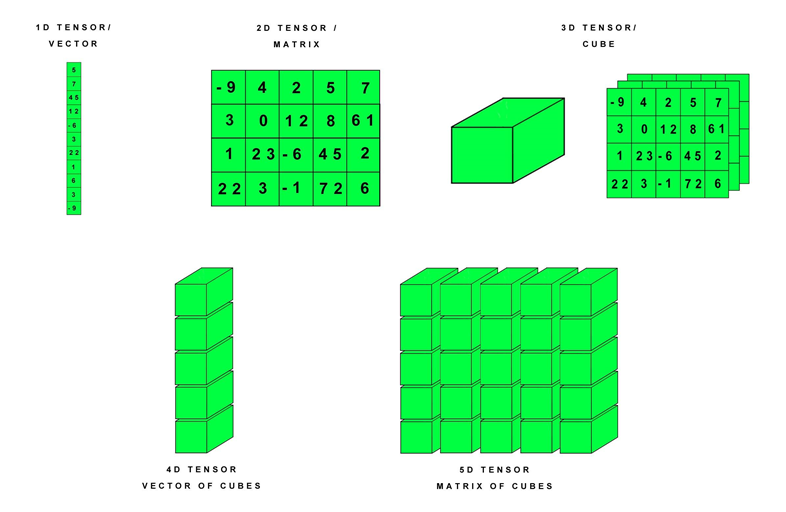

* Классификация и регрессия

разделяем и классифицируем

![клас.регр.](https://evileg.com/media/uploads/2017/11/15/wnunvc.png)

* [KNN](
https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_k-%D0%B1%D0%BB%D0%B8%D0%B6%D0%B0%D0%B9%D1%88%D0%B8%D1%85_%D1%81%D0%BE%D1%81%D0%B5%D0%B4%D0%B5%D0%B9)


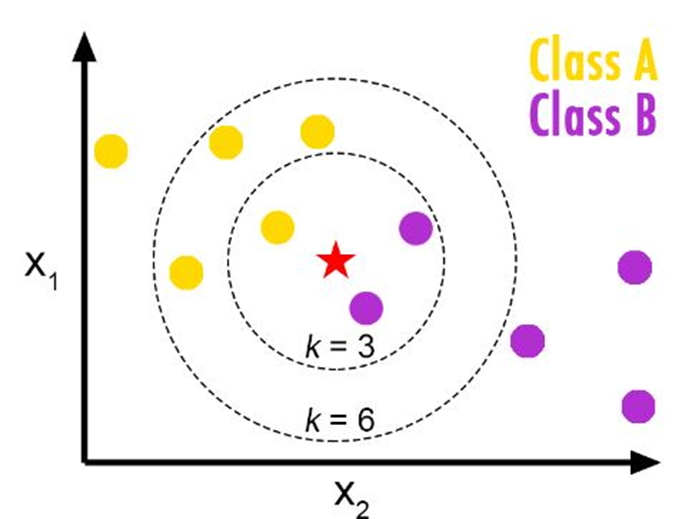

* Переобучение

cлишком сильно [подстроились](https://neerc.ifmo.ru/wiki/index.php?title=%D0%9F%D0%B5%D1%80%D0%B5%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5) под данные 
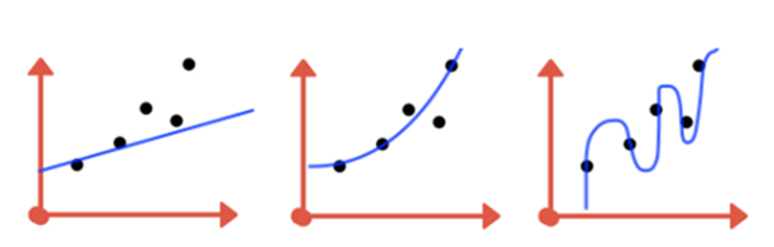

* Train / test split

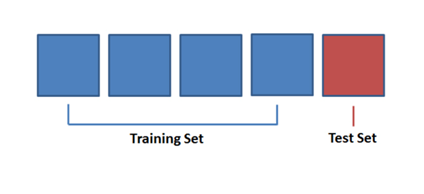

# Занятие 6

In [0]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

-------
<h1 align="center"> Работа с признаками </h1> 

# Предобработка данных
скачайте данные с помощью pd.read_csv по ссылке https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data и уберите заголовок

In [0]:
# Считываем данные
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')

# Назначаем имена колонок
columns = ('age workclass fnlwgt education educ-num marital-status occupation relationship '
           'race sex capital-gain capital-loss  hours-per-week native-country salary')

df.columns = columns.split() #этот метод разделит датасет по колонкам как в массиве columns

In [0]:
df.head()

,age,workclass,fnlwgt,education,educ-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


### Перекодировка категориальных признаков

Алгоритмы не могут работать с текстовыми данными без предварительной конвертации в числовой формат.

Работа с категориальными признаками может быть устроена по разному.

В этой задаче предлагается заменить все уникальные значения таких признаков некоторым числовым значением.

In [0]:
# Подключаем класс для предобработки данных
from sklearn import preprocessing

# Напишем функцию, которая принимает на вход DataFrame, кодирует числовыми значениями категориальные признаки
# и возвращает обновленный DataFrame и сами кодировщики.
def number_encode_features(init_df):
    result = init_df.copy() # копируем нашу исходную таблицу
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object: # np.object -- строковый тип / если тип столбца - строка, то нужно его закодировать
            encoders[column] = preprocessing.LabelEncoder() # для колонки column создаем кодировщик
            result[column] = encoders[column].fit_transform(result[column]) # применяем кодировщик к столбцу и перезаписываем столбец
    return result, encoders

encoded_data, encoders = number_encode_features(df) # Теперь encoded data содержит закодированные кат. признаки 
encoded_data.head() 

,age,workclass,fnlwgt,education,educ-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0


In [0]:
# отображаем его
encoders

{'education': LabelEncoder(),
 'marital-status': LabelEncoder(),
 'native-country': LabelEncoder(),
 'occupation': LabelEncoder(),
 'race': LabelEncoder(),
 'relationship': LabelEncoder(),
 'salary': LabelEncoder(),
 'sex': LabelEncoder(),
 'workclass': LabelEncoder()}

Посмотрим, во что переведены категориальные признаки

In [0]:
df.groupby('marital-status').count()[['age']]

,age
marital-status,
Divorced,4443
Married-AF-spouse,23
Married-civ-spouse,14976
Married-spouse-absent,418
Never-married,10682
Separated,1025
Widowed,993


In [0]:
encoded_data.groupby('marital-status').count()[['age']]

,age
marital-status,
0,4443
1,23
2,14976
3,418
4,10682
5,1025
6,993


In [0]:
df.groupby('workclass').count()[['age']]

,age
workclass,
?,1836
Federal-gov,960
Local-gov,2093
Never-worked,7
Private,22696
Self-emp-inc,1116
Self-emp-not-inc,2541
State-gov,1297
Without-pay,14


In [0]:
encoded_data.groupby('workclass').count()[['age']]

,age
workclass,
0,1836
1,960
2,2093
3,7
4,22696
5,1116
6,2541
7,1297
8,14


### Гистограммы значений
постройте графики гистограмм зависимости различных признаков для того, чтоб оценить корректность данных

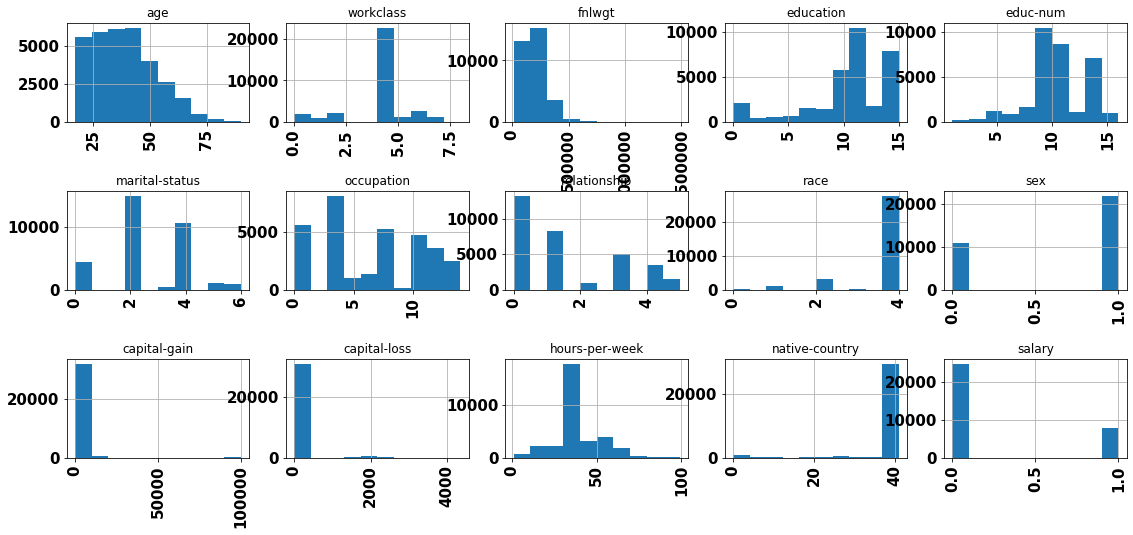

In [0]:
fig = plt.figure(figsize=(19,8))
cols = 5
rows = np.ceil(float(encoded_data.shape[1]) / cols)
for i, column in enumerate(encoded_data.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    encoded_data[column].hist(axes=ax)
    plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

### Матрица корреляций

По тепловой карте можно посмотреть на зависимости между признаками, а также на зависимости между целевой переменной и признаками. 

Положительная зависимость означает прямую зависимость (чем больше одно, тем меньше другое), отрицательная означает обратное.

Значение близкое к нулю не обязательно означает отсутствие зависимости! Это лишь значит, что между признаками нет прямой (линейной) зависимости

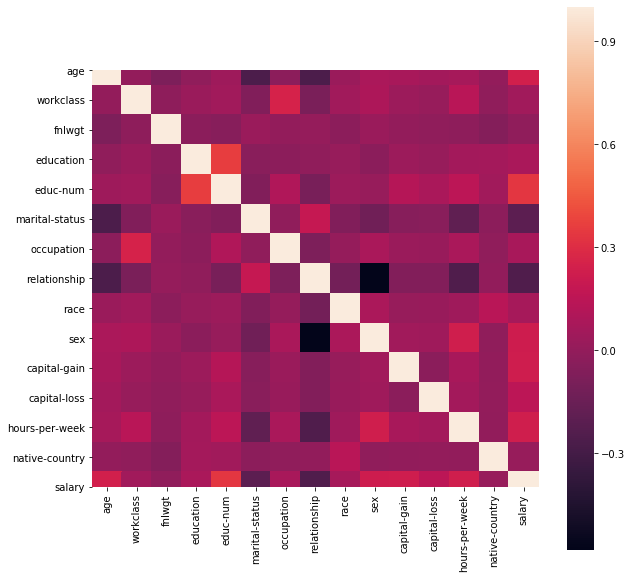

In [0]:
# тоже крутой модуль, для различной визуализации данных
import seaborn as sns

plt.subplots(figsize=(10,10))
encoded_data, encoders = number_encode_features(df)
sns.heatmap(encoded_data.corr(), square=True)
plt.show()

В данном датасете пропущенные значения обозначены как " ?".  Удалим из выборки все объекты с пропусками.

In [0]:
# удалим все объекты, в которых содержатся пропуски
df = df.dropna()
df.count()

age               32560
workclass         32560
fnlwgt            32560
education         32560
educ-num          32560
marital-status    32560
occupation        32560
relationship      32560
race              32560
sex               32560
capital-gain      32560
capital-loss      32560
hours-per-week    32560
native-country    32560
salary            32560
dtype: int64

In [0]:
df.groupby('salary').count()[['age']]

,age
salary,
<=50K,24719
>50K,7841


Будем предсказывать salary (> или < 50к в год - бинарная классификация)

In [0]:
# создадим копию
df_prc = df.copy()
df_prc['salary'] = df['salary'].apply((lambda x: x==' >50K')) # Будем предсказывать 1(True), если зарплата больше 50K, 0(False) иначе
df_prc.head()

,age,workclass,fnlwgt,education,educ-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,False
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,False
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,False
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,False
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,False


Для того, чтоб можно было выбрать нужные колонки

In [0]:
# числовые признаки
df._get_numeric_data().columns

Index(['age', 'fnlwgt', 'educ-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [0]:
# Найдём категориальные признаки
Categorical_cols = list(set(df.columns) - set(df._get_numeric_data().columns))
Categorical_cols

['race',
 'sex',
 'salary',
 'native-country',
 'relationship',
 'marital-status',
 'occupation',
 'workclass',
 'education']

In [0]:
X = np.array(df_prc[df._get_numeric_data().columns])
# y = np.array(df_prc['salary'], dtype='int')
y = encoders['salary'].transform(df['salary']) # применяем наши кодировщики к категориальным фичам

In [0]:
X

array([[    50,  83311,     13,      0,      0,     13],
       [    38, 215646,      9,      0,      0,     40],
       [    53, 234721,      7,      0,      0,     40],
       ...,
       [    58, 151910,      9,      0,      0,     40],
       [    22, 201490,      9,      0,      0,     20],
       [    52, 287927,      9,  15024,      0,     40]])

In [0]:
y

array([0, 0, 0, ..., 0, 0, 1])

------------------------------
# Масштабирование признаков

В качестве классификатора используем kNN, признаки: число соседей (*n_neighbors*) и метрика (*metrics*).

Подберём оптимальные значения указанных гиперпараметров

In [0]:
# Будем использовать модель k ближайших соседей, которую проходили на 5 занятии
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

Для получения более точной оценки нашего алгоритма будем использовать [кросс-валидацию](https://neerc.ifmo.ru/wiki/index.php?title=%D0%9A%D1%80%D0%BE%D1%81%D1%81-%D0%B2%D0%B0%D0%BB%D0%B8%D0%B4%D0%B0%D1%86%D0%B8%D1%8F)

Результаты тестов на каждом проходе (fold) усредним

![alt text](http://scott.fortmann-roe.com/docs/docs/MeasuringError/crossvalidation.png)

### Подбор параметра n_neighbors для KNeighborsClassifier

У алгоритма knn есть один гиперпараметр (то значение, которое мы выставляем руками) -- число соседей на основе которых алгоритм принимает решение.

Как обсуждалось на лекции, подбор подобных параметров можно осуществлять на основе специальной отложенной (тестовой) выборки, а можно с помощью кросс-валидации. (Вспомните, какие плюсы и минусы имеет каждый из подходов)

В данной задаче мы будем использовать кросс-валидацию на 5 фолдах.

In [0]:
# В sklearn есть специальный модуль для работы с кросс-валидацией
from sklearn.model_selection import GridSearchCV

# Зададим сетку - среди каких значений выбирать наилучший параметр.
knn_grid = {'n_neighbors': np.array(np.linspace(15, 25, 15), dtype='int')} # перебираем по параметру <<n_neighbors>>, по сетке заданной np.linspace(2, 100, 10)

# Создаем объект кросс-валидации
gs = GridSearchCV(knn, knn_grid, cv=5)

# Обучаем его
gs.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([15, 15, 16, 17, 17, 18, 19, 20, 20, 21, 22, 22, 23, 24, 25])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
# Функция отрисовки графиков

def grid_plot(x, y, x_label, title, y_label='roc_auc'):
    plt.figure(figsize=(12, 6))
    plt.grid(True)
    plt.plot(x, y, 'go-')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

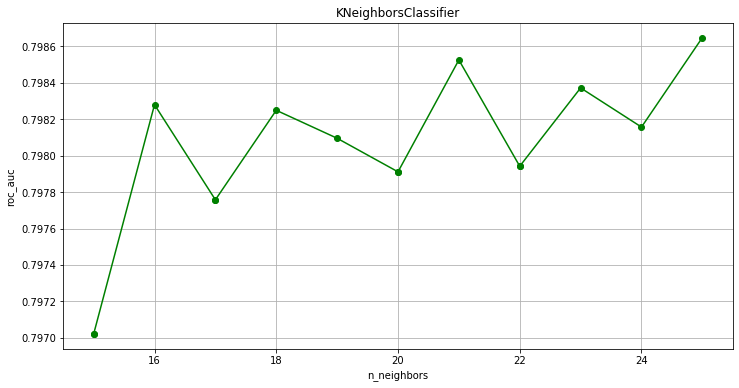

In [0]:
# Строим график зависимости качества от числа соседей
# замечание: результаты обучения хранятся в атрибуте cv_results_ объекта gs

grid_plot(knn_grid['n_neighbors'], gs.cv_results_['mean_test_score'], 'n_neighbors', 'KNeighborsClassifier')

In [0]:
# по аналогии поменяем количество точек для проверки разных значений параметра k - 11 точек в диапазоне от 15 до 35 (равные промежутки, int)
knn_grid = {'n_neighbors': np.array(np.linspace(15, 35, 11), dtype='int')}
gs = GridSearchCV(knn, knn_grid, cv=10)
gs.fit(X, y)

# best_params_ содержит в себе лучшие подобранные параметры, best_score_ лучшее качество
gs.best_params_, gs.best_score_

({'n_neighbors': 29}, 0.7993550368550368)

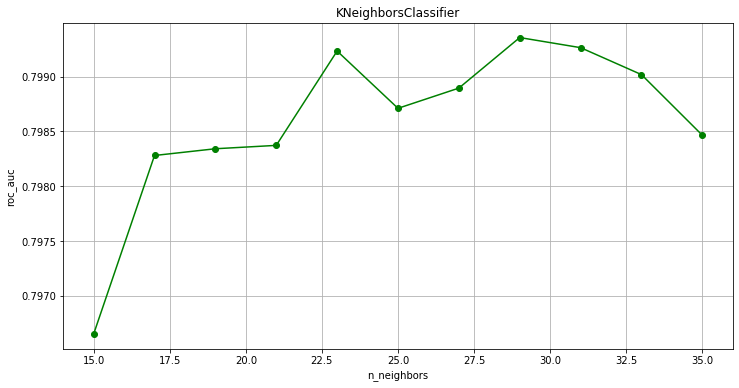

In [0]:
# отобразим результат по аналогии
grid_plot(knn_grid['n_neighbors'], gs.cv_results_['mean_test_score'], 'n_neighbors', 'KNeighborsClassifier')

Масштабирование признаков можно выполнить, например, одним из следующих способов способами:
 - $x_{new} = \dfrac{x - \mu}{\sigma}$, где $\mu, \sigma$ — среднее и стандартное отклонение значения признака по всей выборке (см. функцию [scale](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html))
 - $x_{new} = \dfrac{x - x_{min}}{x_{max} - x_{min}}$, где $[x_{min}, x_{max}]$ — минимальный интервал значений признака

In [0]:
from sklearn.preprocessing import scale
X_scaled = scale(np.array(X, dtype='float'), with_std=True, with_mean=False)

In [0]:
X_scaled

array([[3.66557296, 0.78931753, 5.05311708, 0.        , 0.        ,
        1.05285081],
       [2.78583545, 2.04310556, 3.49831183, 0.        , 0.        ,
        3.23954094],
       [3.88550734, 2.22382878, 2.7209092 , 0.        , 0.        ,
        3.23954094],
       ...,
       [4.25206463, 1.43924842, 3.49831183, 0.        , 0.        ,
        3.23954094],
       [1.6128521 , 1.90898667, 3.49831183, 0.        , 0.        ,
        1.61977047],
       [3.81219588, 2.72792101, 3.49831183, 2.03431427, 0.        ,
        3.23954094]])

### Подборка параметра n_neighbors для KNeighborsClassifier при нормированных признаках

зачем нормализовывать?
см. [пункт нормализация](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_k-%D0%B1%D0%BB%D0%B8%D0%B6%D0%B0%D0%B9%D1%88%D0%B8%D1%85_%D1%81%D0%BE%D1%81%D0%B5%D0%B4%D0%B5%D0%B9)

In [0]:
# обучение идентично предыдущим, но в этот раз нормированные значения
grid = {'n_neighbors': np.array(np.linspace(50, 85, 35), dtype='int')}
gs = GridSearchCV(knn, grid, cv=10, n_jobs=5)
gs.fit(X_scaled, y)
print(gs.best_params_, gs.best_score_)
grid_plot(grid['n_neighbors'], gs.cv_results_['mean_test_score'], 'n_neighbors', 'KNeighborsClassifier')

KeyboardInterrupt: ignored

{'n_neighbors': 59} 0.8229115479115479


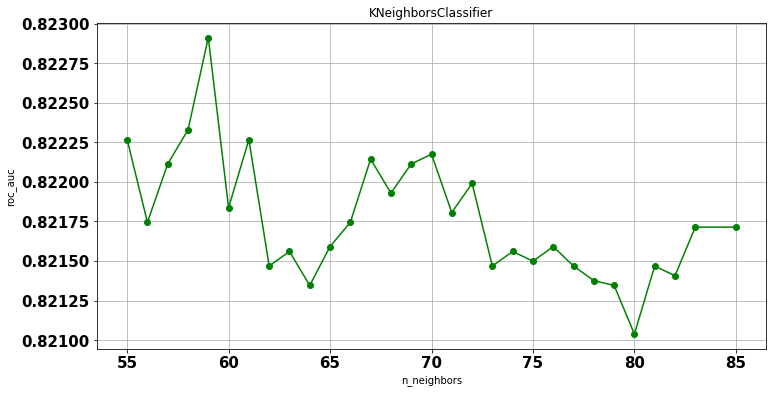

In [0]:
# все тот же код, перебираем другие значения
grid = {'n_neighbors': np.array(np.linspace(55, 85, 30), dtype='int')}
gs = GridSearchCV(knn, grid, cv=10, n_jobs=5)
gs.fit(X_scaled, y)
print(gs.best_params_, gs.best_score_)
grid_plot(grid['n_neighbors'], gs.cv_results_['mean_test_score'], 'n_neighbors', 'KNeighborsClassifier')

<h1 align="center"> Метрики </h1> 

# Метрики для задачи классификации

[ВАЖНО](https://habr.com/ru/company/ods/blog/328372/) прочесть

### Accuracy

Не подходит для несбалансированных классов. 

Пускай имеем задачу кредитного скоринга: 100 людей, 10 из них ненадежные заемщики и выдача кредита им принесет убытки. Accuracy будет 90/100 = 90%

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_tain, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

### Используем 2 классификаторва 
- умный kNN
- глупый -- DummyClassifier (самый популярный класс)

In [0]:
from sklearn import dummy

# импортируем и создаем knn классификатор по аналогии
knn = KNeighborsClassifier(n_neighbors=59) 
# тренируем для knn и для dummy
clf_knn = knn.fit(X_train, y_tain)
clf_mp = dummy.DummyClassifier("most_frequent").fit(X_train, y_tain)

In [0]:
# получаем от них предикты
y_knn = clf_knn.predict(X_test)
y_mp = clf_mp.predict(X_test)

In [0]:
# ответы knn
y_knn

array([0, 0, 0, ..., 0, 1, 0])

In [0]:
# реальные ответы
y_test

array([0, 0, 1, ..., 0, 1, 0])

### Accuracy

$$Accuracy = \frac{\sum_{x_i, y_i \in (X, Y)} I(y(x_i) = y_i)}{|(X, Y)|} = \frac{num~right~classified~obj}{num~all~obj}$$

In [0]:
from sklearn import metrics

print ('knn =', metrics.accuracy_score(y_test, y_knn), 'mp =', metrics.accuracy_score(y_test, y_mp))

knn = 0.7891112145183806 mp = 0.7553280595625872


### Conf-matrix

Text(0.5, 42.0, 'Predicted value')

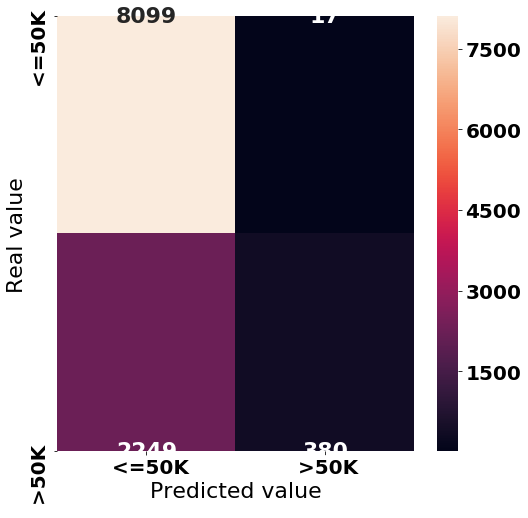

In [0]:
import matplotlib

# нужно получить кол-во правильных и неправильых предсказаний по каждому классу от knn
# см. https://habr.com/ru/company/ods/blog/328372/

fig = plt.figure(figsize=(8,8))
nn_mtx = metrics.confusion_matrix(y_test, y_knn)

font = {'weight' : 'bold', 'size'   :22}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
sns.heatmap(nn_mtx, annot=True, fmt="d", 
            xticklabels=encoders["salary"].classes_, 
            yticklabels=encoders["salary"].classes_)
plt.ylabel("Real value")
plt.xlabel("Predicted value")

Text(0.5, 42.0, 'Predicted value')

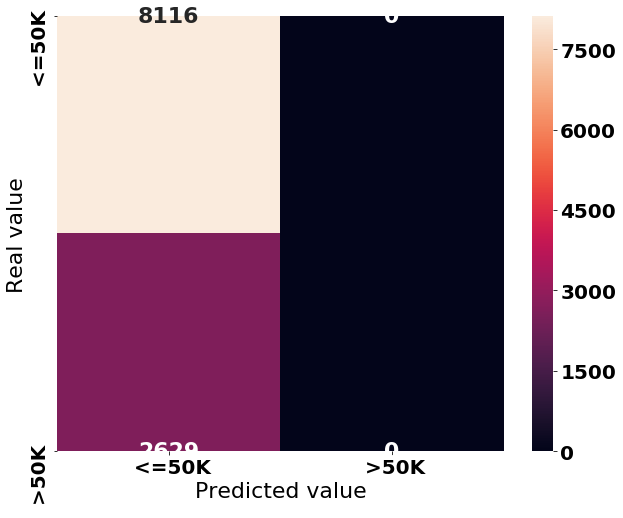

In [0]:
# по аналогии от dummy

mp_mtx = metrics.confusion_matrix(y_test, y_mp)

font = {'family' : 'Calibri', 'weight' : 'bold', 'size'   :22}
matplotlib.rc('font', **font)
fig = plt.figure(figsize=(10,8))
sns.heatmap(mp_mtx, annot=True, fmt="d", 
            xticklabels=encoders["salary"].classes_, 
            yticklabels=encoders["salary"].classes_)
plt.ylabel("Real value")
plt.xlabel("Predicted value")

## Precision

$$Precision = \frac{TP}{TP + FP}$$

precision демонстрирует способность отличать этот класс от других классов

In [0]:
print ('knn =', metrics.precision_score(y_test, y_knn), 'mp =', metrics.precision_score(y_test, y_mp))

knn = 0.9571788413098237 mp = 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


## Recall

$$Recall = \frac{TP}{TP + FN}$$

Recall демонстрирует способность алгоритма обнаруживать данный класс вообще

In [0]:
print ('knn =', metrics.recall_score(y_test, y_knn), 'mp =', metrics.recall_score(y_test, y_mp))

knn = 0.14454165081780146 mp = 0.0


In [0]:
print(metrics.classification_report(y_test, y_knn))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      8116
           1       0.96      0.14      0.25      2629

    accuracy                           0.79     10745
   macro avg       0.87      0.57      0.56     10745
weighted avg       0.83      0.79      0.72     10745



визуализация precision и recall

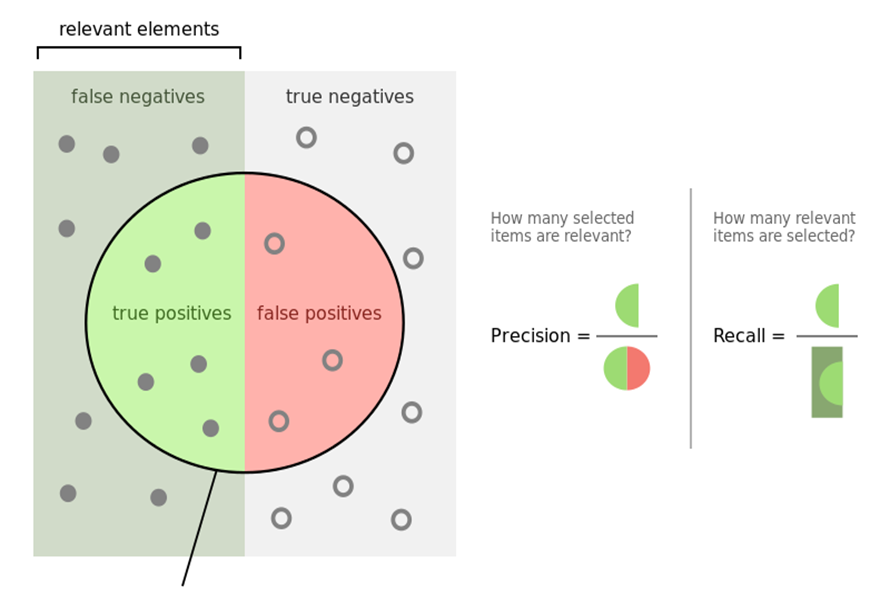

## F1

$$F1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}$$

* Как взвесить Precision и Recall?
    - Среднее арифметичиское плохо: (p=0.5, r=0.5) должно быть лучше чем (p=1, r=0), 
    - Лучше минимум, но при равной точности должен побеждать классфикатор с большей полнотой
    - Гармоничиское среднее, сглаженный минимум

In [0]:
print ('knn =', metrics.f1_score(y_test, y_knn), 'mp =', metrics.f1_score(y_test, y_mp))

knn = 0.25115664243225383 mp = 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


# <span style="color:orange"> Multiclass Precision-Recall </span>

#### Загрузим датасет с тремя классами

In [0]:
print(sns.get_dataset_names())
df_iris = sns.load_dataset("iris")
df_iris = df_iris.sample(n=150)
df_iris.head()

['anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'iris', 'mpg', 'planets', 'tips', 'titanic']


/usr/local/lib/python3.6/dist-packages/seaborn/utils.py:376: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 376 of the file /usr/local/lib/python3.6/dist-packages/seaborn/utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


,sepal_length,sepal_width,petal_length,petal_width,species
72,6.3,2.5,4.9,1.5,versicolor
131,7.9,3.8,6.4,2.0,virginica
113,5.7,2.5,5.0,2.0,virginica
119,6.0,2.2,5.0,1.5,virginica
77,6.7,3.0,5.0,1.7,versicolor


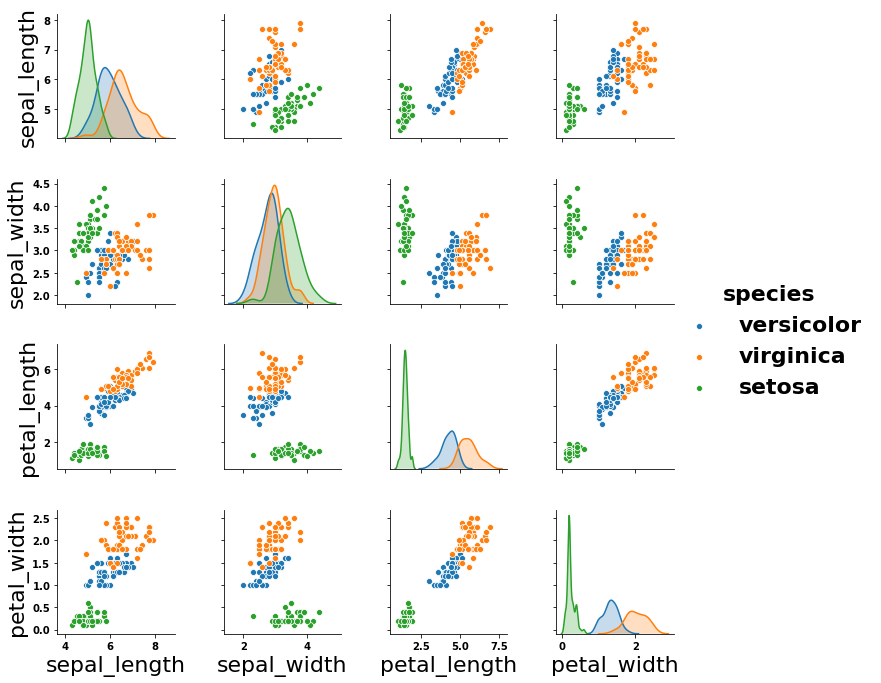

In [0]:
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10)
sns.pairplot(df_iris, hue="species")

[Датасет ириса](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [0]:
# закодируем значения
df_iris, encoders = number_encode_features(df_iris)
# выбросим колонку, которую будем предсказывать
iris_X, iris_y = df_iris[df_iris.columns[:-1]].values, df_iris[df_iris.columns[-1]].values

# разделим на train test слайсингом
iris_X_train, iris_y_tain = iris_X[:30], iris_y[:30]
iris_X_test, iris_y_test = iris_X[40:], iris_y[40:]

In [0]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
72,6.3,2.5,4.9,1.5,1
131,7.9,3.8,6.4,2.0,2
113,5.7,2.5,5.0,2.0,2
119,6.0,2.2,5.0,1.5,2
77,6.7,3.0,5.0,1.7,1


In [0]:
# KNN и dummpy классификаторы на датасете
iris_clf_knn = KNeighborsClassifier().fit(iris_X_train, iris_y_tain)
iris_clf_mp = dummy.DummyClassifier("most_frequent").fit(iris_X_train, iris_y_tain)

In [0]:
# предсказываем
iris_y_knn = iris_clf_knn.predict(iris_X_test)
iris_y_mp = iris_clf_mp.predict(iris_X_test)

Пусть выборка состоит из K классов. Рассмотрим K двухклассовых задач, каждая из которых заключается в отделении своего класса от остальных, то есть целевые значения для k-й задаче вычисляются как $y_{ik} = [yi = k]$. Для каждой из них можно вычислить различные характеристики (TP, FP, и т.д.) алгоритма $a_k(x) = [a(x) = k]$.

Text(0.5, 46.0, 'Predicted value')

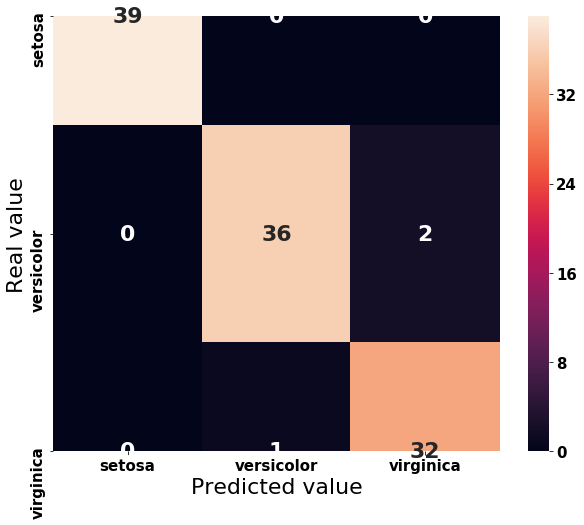

In [0]:
mp_mtx = metrics.confusion_matrix(iris_y_test, iris_y_knn)

fig = plt.figure(figsize=(10,8))
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15)
sns.heatmap(mp_mtx, annot=True, fmt="d", 
            xticklabels=encoders["species"].classes_, 
            yticklabels=encoders["species"].classes_)
plt.ylabel("Real value")
plt.xlabel("Predicted value")

**Macro-averaging** -- подсчет TP, FN, TN, FP для каждого класса, а после подсчет точности и полноты.

**Micro-averaging** -- подсчет  точности и полноты для каждого класса, а после подсчет их среденего.

In [0]:
print('для kNN:')
print ('macro = ', metrics.f1_score(iris_y_test, iris_y_knn, average='macro'), ', micro = ', metrics.f1_score(iris_y_test, iris_y_knn, average='micro'))

# 
print('\nдля dummy-classifier:')
iris_y_knn[iris_y_knn==1] = 0
print ('macro = ', metrics.f1_score(iris_y_test, iris_y_knn, average='macro'), ', micro = ', metrics.f1_score(iris_y_test, iris_y_knn, average='micro'))

для kNN:
macro =  0.5444949167207441 , micro =  0.6454545454545455

для dummy-classifier:
macro =  0.5444949167207441 , micro =  0.6454545454545455


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# AUC-ROC

[ВАЖНО](https://dyakonov.org/2017/07/28/auc-roc-%D0%BF%D0%BB%D0%BE%D1%89%D0%B0%D0%B4%D1%8C-%D0%BF%D0%BE%D0%B4-%D0%BA%D1%80%D0%B8%D0%B2%D0%BE%D0%B9-%D0%BE%D1%88%D0%B8%D0%B1%D0%BE%D0%BA/) прочесть

In [0]:
# по аналогии возьмем knn и dummpy
clf_knn = KNeighborsClassifier(n_neighbors=29).fit(X_train, y_tain)
clf_mp = dummy.DummyClassifier("most_frequent").fit(X_train, y_tain)

In [0]:
# получаем ответы от классификаторов
y_knn = clf_knn.predict(X_test)
y_mp = clf_mp.predict(X_test)

ROC AUC = 0.5892


Text(0.5, 0, 'False Positive Rate')

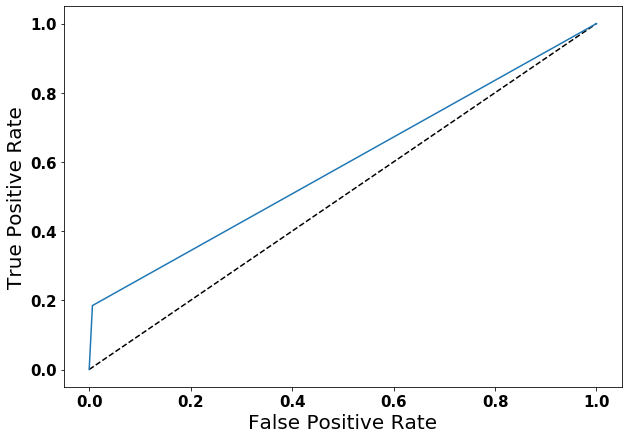

In [0]:
# строим рок кривую, чтоб посмотреть как справляемся с данными 
# (результат плохой у монетки roc auc = 0.5, см classification report f1, классы разбалансированны)
fpr, tpr, _ = metrics.roc_curve(y_test, y_knn)
plt.figure(figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
print ('ROC AUC = {0:.4f}'.format(metrics.auc(fpr, tpr)))
plt.ylabel("True Positive Rate", fontsize=20)
plt.xlabel("False Positive Rate", fontsize=20)

ROC AUC = 0.5000


Text(0.5, 0, 'False Positive Rate')

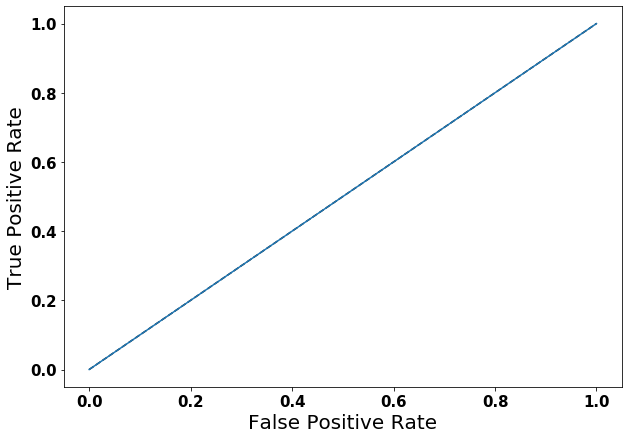

In [0]:
from matplotlib import pylab
fpr, tpr, _ = metrics.roc_curve(y_test, y_mp)
pylab.figure(figsize=(10, 7))
pylab.plot([0, 1], [0, 1], 'k--')
pylab.plot(fpr, tpr)
print ('ROC AUC = {0:.4f}'.format(metrics.auc(fpr, tpr)))
plt.ylabel("True Positive Rate", fontsize=20)
plt.xlabel("False Positive Rate", fontsize=20)

# Метрики для задачи рeгрессии

Data: https://archive.ics.uci.edu/ml/datasets/Wine+Quality

In [0]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', header=0, sep=';')

In [0]:
# будем предсказывать столбец quality (качество) вина по всем параметрам с помощью линейных методов и dummy
df.head(100)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
95,7.1,0.260,0.29,12.4,0.044,62.0,240.0,0.9969,3.04,0.42,9.2,6
96,6.0,0.340,0.66,15.9,0.046,26.0,164.0,0.9979,3.14,0.50,8.8,6
97,8.6,0.265,0.36,1.2,0.034,15.0,80.0,0.9913,2.95,0.36,11.4,7
98,9.8,0.360,0.46,10.5,0.038,4.0,83.0,0.9956,2.89,0.30,10.1,4


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4dd2867be0>,
      dtype=object)

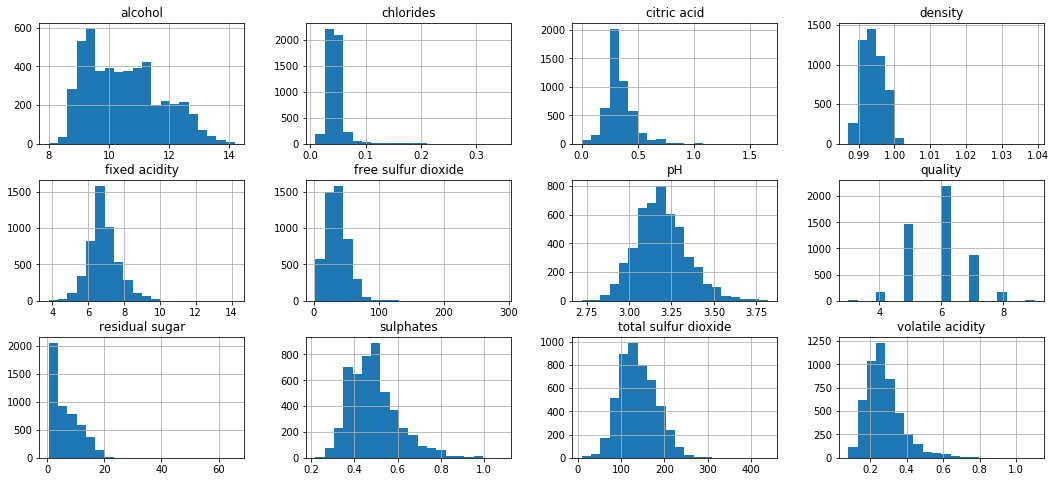

In [0]:
# строим гистограммы быстрее, чем в начале занятия
df.hist(figsize=(18, 8), layout=(3,4), bins=20)

In [0]:
# разделяем данные, убираем из обучающей ответы
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('quality', axis=1), df.quality, test_size=0.33, random_state=42)

In [0]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
3167,5.6,0.28,0.40,6.1,0.034,36.0,118.0,0.99144,3.21,0.43,12.1
324,8.3,0.41,0.51,2.0,0.046,11.0,207.0,0.99300,3.02,0.55,11.4
4731,5.3,0.31,0.38,10.5,0.031,53.0,140.0,0.99321,3.34,0.46,11.7
2305,7.0,0.36,0.30,5.0,0.040,40.0,143.0,0.99173,3.33,0.42,12.2
1777,6.5,0.18,0.26,1.4,0.041,40.0,141.0,0.99410,3.34,0.72,9.5


In [0]:
# качество вынесли в отдельную y
y_train.head()

3167    7
324     5
4731    6
2305    7
1777    6
Name: quality, dtype: int64

In [0]:
# размеры обучающей и тестовой
print (X_train.shape, X_test.shape)
print (y_train.shape, y_test.shape)

(3281, 11) (1617, 11)
(3281,) (1617,)


In [0]:
from sklearn import linear_model

# линейный классификатор
regr = linear_model.LinearRegression()

# обучаем
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# dummy классификатор
from sklearn import dummy

d_regr = dummy.DummyRegressor(strategy='mean')

# обучаем
d_regr.fit(X_train, y_train)

DummyRegressor(constant=None, quantile=None, strategy='mean')

In [0]:
# получаем предсказания от двух
predictions = regr.predict(X_test)

In [0]:
d_predictions = d_regr.predict(X_test)

In [0]:
# для всех вин имеем предсказания от линейного и dummy, отобразим первые 5
print (predictions.shape, '\t', predictions[0:5])

(1617,) 	 [6.37886848 6.3994996  6.40362171 5.82459689 6.45383134]


In [0]:
print (d_predictions.shape, '\t', d_predictions[0:5])

(1617,) 	 [5.86863761 5.86863761 5.86863761 5.86863761 5.86863761]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


(array([0.00944673, 0.01417009, 0.00944673, 0.02834018, 0.04251027,
        0.03306354, 0.04723363, 0.12280745, 0.12280745, 0.11808409,
        0.13225418, 0.18893454, 0.27395508, 0.35425226, 0.45816626,
        0.42510271, 0.46761298, 0.50067653, 0.48178307, 0.55735689,
        0.63765407, 0.5431868 , 0.54791016, 0.42982608, 0.34008217,
        0.23616817, 0.1417009 , 0.08502054, 0.07557382, 0.03778691,
        0.04723363, 0.01889345, 0.02834018, 0.02361682, 0.01417009,
        0.00472336, 0.01417009, 0.00472336, 0.        , 0.        ,
        0.        , 0.00472336, 0.        , 0.00472336, 0.00472336,
        0.        , 0.        , 0.        , 0.        , 0.00472336]),
 array([-2.45820085, -2.32727102, -2.19634119, -2.06541135, -1.93448152,
        -1.80355169, -1.67262186, -1.54169202, -1.41076219, -1.27983236,
        -1.14890252, -1.01797269, -0.88704286, -0.75611303, -0.62518319,
        -0.49425336, -0.36332353, -0.23239369, -0.10146386,  0.02946597,
         0.1603958 ,  0.29

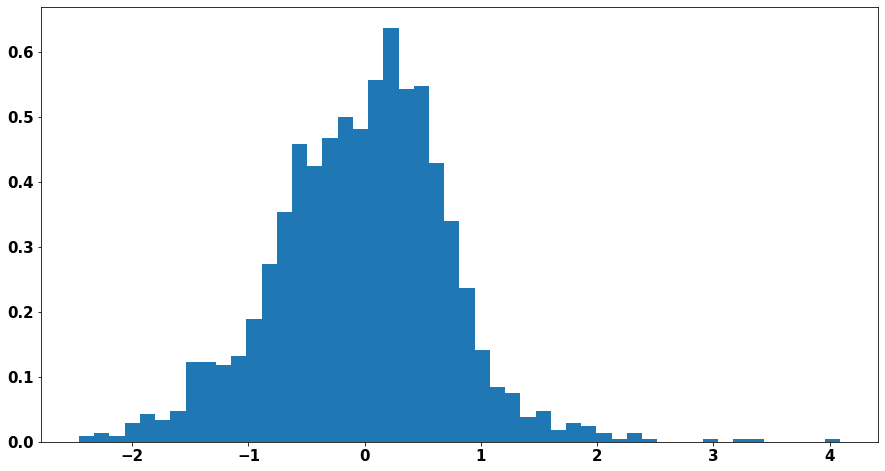

In [0]:
# отобразим разность предсказаний на гистограмме
rem = predictions - y_test
plt.figure(figsize=(15, 8))
plt.hist(rem, bins=50, normed=True)

### Mean Square Error 

## $$ MSE(y, \hat y) = \frac{1}{n_{samples}} \sum_{i=1}^{n_{samples}} ( y_i - \hat y_i )^2 $$

In [0]:
# см. ссылки выше
from sklearn import metrics
mse = metrics.mean_squared_error(y_test, predictions)
d_mse = metrics.mean_squared_error(y_test, d_predictions)

print ("MSE,  LR = {0:.4}, Dummy = {1:0.4}".format(mse, d_mse))

MSE,  LR = 0.5576, Dummy = 0.7638


In [0]:
rmse = np.sqrt(mse)
d_rmse = np.sqrt(d_mse)

print( "RMSE / LR = {0:.4}, Dummy = {1:0.4}".format(rmse, d_rmse))

RMSE / LR = 0.7467, Dummy = 0.8739


### Mean Absolute Error 

## $$ MAE(y, \hat y) = \frac{1}{n_{samples}} \sum_{i=1}^{n_{samples}} | y_i - \hat y_i | $$

In [0]:
mae = metrics.mean_absolute_error(y_test, predictions)
d_mae = metrics.mean_absolute_error(y_test, d_predictions)

print( "MAE / LR = {0:.4}, Dummy = {1:0.4}".format(mae, d_mae))

MAE / LR = 0.5806, Dummy = 0.6663


### Median Absolute Error 

In [0]:
medae = metrics.median_absolute_error(y_test, predictions)
d_medae = metrics.median_absolute_error(y_test, d_predictions)

print ("MedAE / LR = {0:.4}, Dummy = {1:0.4}".format(medae, d_medae))

MedAE / LR = 0.481, Dummy = 0.8686


### R² score, the coefficient of determination

## $$ R^2(y, \hat y) = 1 -  \frac{\sum_{i=1}^{n_{samples}} ( y_i - \hat y_i )^2}{\sum_{i=1}^{n_{samples}} {( y_i - \bar y_i )^2}} $$

## $ \bar y = \frac{1}{n_{samples}} \sum_{i=1}^{n_{samples}} y_i $

In [0]:
r2 = metrics.r2_score(y_test, predictions)
d_r2 = metrics.r2_score(y_test, d_predictions)

print ("R2 score / LR = {0:.4}, Dummy = {1:0.4}".format(r2, d_r2))

R2 score / LR = 0.2692, Dummy = -0.001034


Text(0, 0.5, 'Recall')

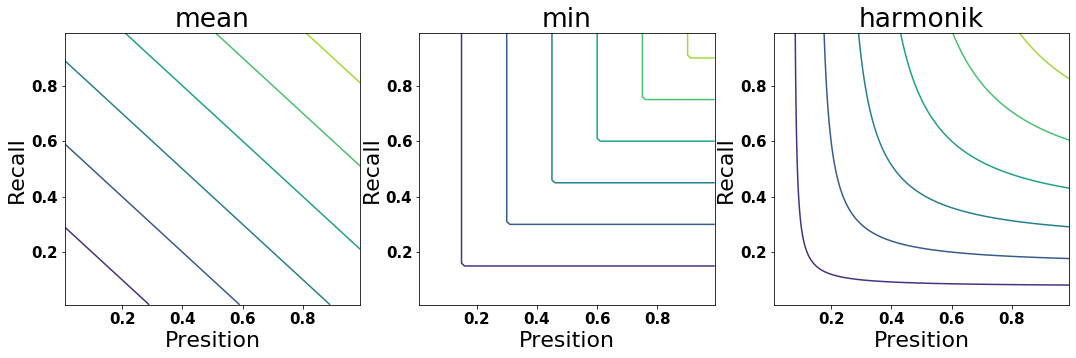

In [0]:
import scipy

fig, axs = plt.subplots(figsize=(18, 5), ncols=3)

x_, y_ = np.arange(0.01, 1, 0.01), np.arange(0.01, 1, 0.01)
X, Y = np.meshgrid(x_, y_)

Z = [[0.5*x + 0.5*y  for x in x_] for y in y_]
axs[0].contour(X, Y, Z)
axs[0].set_title('mean')
axs[0].set_xlabel('Presition')
axs[0].set_ylabel('Recall')

Z = [[min(x, y)  for x in x_] for y in y_]
axs[1].contour(X, Y, Z)
axs[1].set_title('min')
axs[1].set_xlabel('Presition')
axs[1].set_ylabel('Recall')


Z = [[scipy.stats.hmean([x, y])  for x in x_] for y in y_]
axs[2].contour(X, Y, Z)
axs[2].set_title('harmonik')
axs[2].set_xlabel('Presition')
axs[2].set_ylabel('Recall')

In [0]:
from google.colab import drive
drive.mount('/content/drive')